In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def autocorrelation(series, H, save_path):
    """
    Calculates and plots the autocorrelation function (ACF) of a time series.

    Parameters
    ----------
    series : pandas.Series
        The time series data.
    H : int
        The maximum lag to compute.
    save_path : str
        File path to save the ACF plot.

    Returns
    -------
    list
        Autocorrelation values for lags 1 to H.
    """
    N = len(series)
    mean = series.mean()
    var = np.var(series)
    acf = []

    for lag in range(1, H + 1):
        cov = np.sum((series[lag:] - mean) * (series[:-lag] - mean)) / N
        acf.append(cov / var)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, H + 1), acf)
    plt.title("Função de Autocorrelação (ACF)")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelação")
    plt.grid(True)
    plt.savefig(save_path)
    plt.close()

    return acf

In [3]:
ibov = yf.download('^BVSP', start='2010-01-01', end='2023-10-01')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


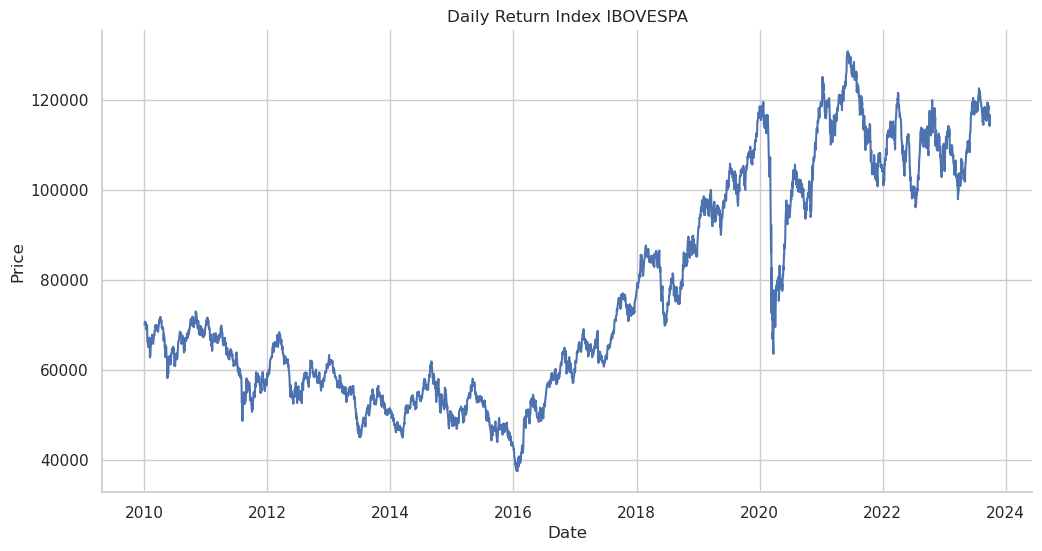

In [4]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(ibov, legend=False)
plt.title('Daily Return Index IBOVESPA')
plt.xlabel('Date')
plt.ylabel('Price')
sns.despine()
plt.show()

In [33]:
autocorrelation(ibov['^BVSP'].values, 30, 'autocorrelation_ibov.png')

[np.float64(0.9984480747384409),
 np.float64(0.997098576602979),
 np.float64(0.9957063959412995),
 np.float64(0.9942925452441448),
 np.float64(0.9928788713913242),
 np.float64(0.9914109769966013),
 np.float64(0.9900666874036246),
 np.float64(0.9884654355078314),
 np.float64(0.986867287694384),
 np.float64(0.9852239554172049),
 np.float64(0.9835063036858305),
 np.float64(0.9817181589644417),
 np.float64(0.9799499695993039),
 np.float64(0.9782481027456613),
 np.float64(0.9765401346575346),
 np.float64(0.9749008494011303),
 np.float64(0.9732015652280096),
 np.float64(0.9714532132512184),
 np.float64(0.9696702850439834),
 np.float64(0.9679223063341428),
 np.float64(0.9662657274042351),
 np.float64(0.9645162554566727),
 np.float64(0.9627477501379896),
 np.float64(0.9611042798970292),
 np.float64(0.9594528525453463),
 np.float64(0.9578680944401439),
 np.float64(0.9562400437755301),
 np.float64(0.9546000309586928),
 np.float64(0.9529594604165809),
 np.float64(0.9512263945172535)]